In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

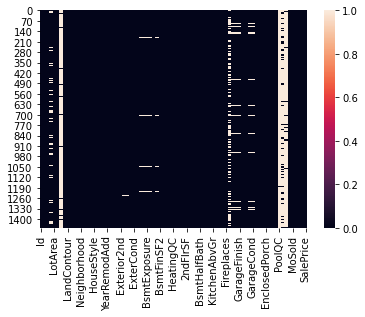

In [5]:
sns.heatmap(train_data.isnull())

In [6]:
train_data.drop(['Street','Alley','LandContour','LandSlope','LotConfig','Neighborhood','Utilities','Condition1','Condition2','BldgType','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterCond','BsmtCond','BsmtQual','BsmtExposure','BsmtFinSF1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','FireplaceQu','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition','Functional'],axis=1,inplace= True)

In [7]:
test_data.drop(['Street','Alley','LandContour','LandSlope','LotConfig','Neighborhood','Utilities','Condition1','Condition2','BldgType','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterCond','BsmtCond','BsmtQual','BsmtExposure','BsmtFinSF1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','FireplaceQu','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition','Functional'],axis=1,inplace= True)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   HouseStyle     1460 non-null   object 
 7   OverallQual    1460 non-null   int64  
 8   OverallCond    1460 non-null   int64  
 9   YearBuilt      1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  MasVnrArea     1452 non-null   float64
 12  ExterQual      1460 non-null   object 
 13  Foundation     1460 non-null   object 
 14  BsmtFinType1   1423 non-null   object 
 15  BsmtFinSF2     1460 non-null   int64  
 16  BsmtUnfSF      1460 non-null   int64  
 17  TotalBsmtSF    1460 non-null   int64  
 18  1stFlrSF

In [9]:
mszoning = pd.get_dummies(train_data['MSZoning'])


In [10]:
mszoning = pd.get_dummies(test_data['MSZoning'])

In [11]:
lotshape = pd.get_dummies(train_data['LotShape'])

In [12]:
lotshape = pd.get_dummies(test_data['LotShape'])

In [13]:
housestyle = pd.get_dummies(train_data['HouseStyle'])

In [14]:
housestyle = pd.get_dummies(test_data['HouseStyle'])

In [15]:
exterqual = pd.get_dummies(train_data['ExterQual'])

In [16]:
exterqual = pd.get_dummies(test_data['ExterQual'])

In [17]:
foundation = pd.get_dummies(train_data['Foundation'])

In [18]:
foundation = pd.get_dummies(test_data['Foundation'])

In [19]:
bsmtfintype1 = pd.get_dummies(train_data['BsmtFinType1'])

In [20]:
bsmtfintype1 = pd.get_dummies(test_data['BsmtFinType1'])

In [21]:
garagetype = pd.get_dummies(train_data['GarageType'])

In [22]:
garagetype = pd.get_dummies(test_data['GarageType'])

In [23]:
train_data = pd.concat([train_data,mszoning,lotshape,housestyle,exterqual,foundation,bsmtfintype1,garagetype],axis=1)

In [24]:
test_data = pd.concat([test_data,mszoning,lotshape,housestyle,exterqual,foundation,bsmtfintype1,garagetype],axis=1)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   HouseStyle     1460 non-null   object 
 7   OverallQual    1460 non-null   int64  
 8   OverallCond    1460 non-null   int64  
 9   YearBuilt      1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  MasVnrArea     1452 non-null   float64
 12  ExterQual      1460 non-null   object 
 13  Foundation     1460 non-null   object 
 14  BsmtFinType1   1423 non-null   object 
 15  BsmtFinSF2     1460 non-null   int64  
 16  BsmtUnfSF      1460 non-null   int64  
 17  TotalBsmtSF    1460 non-null   int64  
 18  1stFlrSF

In [26]:
train_data.drop(['MSZoning','LotShape','HouseStyle','ExterQual','Foundation','BsmtFinType1','GarageType'],axis=1,inplace =True)

In [27]:
test_data.drop(['MSZoning','LotShape','HouseStyle','ExterQual','Foundation','BsmtFinType1','GarageType'],axis=1,inplace =True)

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

<AxesSubplot:>

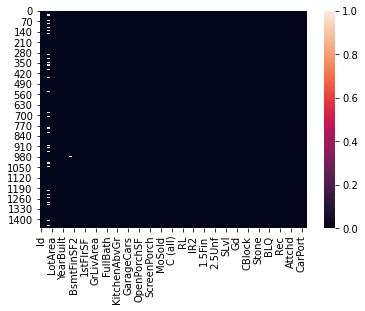

In [29]:
sns.heatmap(train_data.isnull())

In [30]:
train_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,...,GLQ,LwQ,Rec,Unf,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
0,1,60,65.0,8450,7,5,2003,2003,196.0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,1029,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [32]:
train_data['LotFrontage'].fillna(value = train_data['LotFrontage'].mean(),inplace =True)


In [33]:
test_data['LotFrontage'].fillna(value = test_data['LotFrontage'].mean(),inplace = True)

In [34]:
train_data['MasVnrArea'].fillna(value = train_data['MasVnrArea'].mean(),inplace =True)


In [35]:
test_data['MasVnrArea'].fillna(value = test_data['MasVnrArea'].mean(),inplace =True)
test_data['BsmtFinSF2'].fillna(value = test_data['BsmtFinSF2'].mean(),inplace =True)
test_data['BsmtUnfSF'].fillna(value = test_data['BsmtUnfSF'].mean(),inplace =True)
test_data['TotalBsmtSF'].fillna(value = test_data['TotalBsmtSF'].mean(),inplace =True)
test_data['BsmtFullBath'].fillna(value = test_data['BsmtFullBath'].mean(),inplace =True)
test_data['BsmtHalfBath'].fillna(value = test_data['BsmtHalfBath'].mean(),inplace =True)
test_data['GarageCars'].fillna(value = test_data['GarageCars'].mean(),inplace =True)
test_data['GarageArea'].fillna(value = test_data['GarageArea'].mean(),inplace =True)

In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1459 non-null   float64
 17  BsmtHalfBath   1459 non-null   float64
 18  FullBath

In [37]:
train_data.dropna(inplace = True)

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   int64  
 10  BsmtUnfSF      1459 non-null   int64  
 11  TotalBsmtSF    1459 non-null   int64  
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1459 non-null   int64  
 17  BsmtHalfBath   1459 non-null   int64  
 18  FullBath

In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1459 non-null   float64
 17  BsmtHalfBath   1459 non-null   float64
 18  FullBath

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = train_data.drop('SalePrice',axis = 1)

In [42]:
y= train_data['SalePrice']

In [43]:
X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size = 0.3)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(X_train,y_train)

LinearRegression()

In [47]:
print(lm.intercept_)

840341.6422246427


In [48]:
lm.coef_

array([-1.62109473e+00, -1.05139401e+02,  1.21490418e+02,  5.45217166e-01,
        1.33642935e+04,  5.09798236e+03,  3.77532747e+02,  2.12237656e+02,
        3.09991747e+01, -1.49784813e+01, -1.39141968e+01,  3.97451911e+01,
        1.97316687e+01,  2.59838127e+01, -7.53073921e+00,  3.81847423e+01,
        3.14094536e+03,  1.44415836e+02,  1.78361465e+02, -2.31477463e+03,
       -1.37024600e+04, -1.70072527e+04,  4.60144027e+03,  2.06736999e+03,
        2.36649622e+03,  2.51242535e+01,  1.21148584e+01,  2.25936075e+01,
        9.87896774e+00, -1.05113821e+01,  4.51365413e+01, -1.31547011e+02,
       -1.82358113e+00, -3.46617590e+02, -1.02416096e+03, -1.25606568e+04,
       -4.21265729e+03, -3.83970948e+03, -7.60927397e+03, -6.46056611e+03,
       -1.68785984e+03,  3.89828050e+02,  4.56206098e+02,  8.41825688e+02,
       -2.49971917e+03,  3.05806380e+03,  4.21528677e+02, -1.36097424e+04,
       -1.35003735e+03,  6.77999662e+03,  7.19990985e+03,  6.69937264e+03,
       -1.13603551e+04,  

In [49]:
predictions = lm.predict(X_cv)

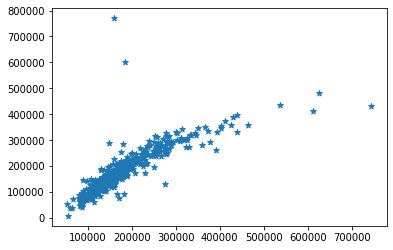

In [50]:
plt.scatter(y_cv,predictions,marker = '*')

In [51]:
from sklearn import metrics

In [52]:
metrics.mean_squared_error(y_cv,predictions)

2463771693.6700563

In [53]:
answer = lm.predict(test_data)

In [54]:
output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': answer})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
